# Bayesian decision theory
This notebook relates to the theoretical contents introduced in module `T2: Computational learning` of the course.

**Specific objetives**:
1. Assimilate the concepts of *prior*, *likelihood*, and *posterior* probabilities.
2. Implement a probabilistic classifier based on the Bayes rule.
3. Study binary and multiclass scenarios with both uni- and multivariate distributions.
4. Understand the *Maximum Likelihood Estimation* mechanism to estimate the parameters of a statistical distribution.
5. Introduce the Naive Bayes classifier.

In [1]:
# CODE CELL RESERVED FOR GLOBAL DEFINITION/LIBRARIES YOU MAY NEED TO DEFINE/INSERT
import numpy
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from scipy.signal import find_peaks

Matplotlib is building the font cache; this may take a moment.


## Problem description: Male VS Female classification
Consider that we need a classifier that distinguishes between **male** and **female** attending to the **weight**. In this Bayesian context we shall assume:
* Two *states of nature* $\mathcal{W} = \left\{\omega_1,\omega_2\right\}$ (male and female)
* A single *feature* $x\in\mathbb{R}$ (weight, in kilograms)
* *Likelihood* for the two classes respectively follows a Gaussian distribution, each of them charatectized by a feature vector $\boldsymbol{\theta}_i = \left\{\mu_i,\sigma^2_i\right\}$, where parameters $\mu_i$ and $\sigma^2_i$ denote the mean and variance of the $i$-th label, respectively. Mathematically:

$$
p(x|\omega_i)\equiv p(x|\omega_i,\boldsymbol{\theta}_i) = \frac{1}{\sqrt{2\pi \sigma^2_i}}\cdot\exp\left({-\frac{(x-\mu_i)^2}{2\sigma^2_i}}\right)
$$


Attending to different studies and analyses of human population, one may also consider:
* Most commonly, weight in human beings oscillates in the range $[25, 100]\,\mathrm{kg}$ (domain of the task).
* World population comprises $65\%$ of women whereas $35\%$ of men.
* The parameters of the Gaussian distributions that define the *likelihood* are:

| Gender ($\omega_i$) | $\mu$ | $\sigma^2$ | 
| :-: | :-: | :-: |
| Male | 75 | 40 |
| Female | 60 | 30 |

### Bayesian estimation
Considering the above, ellaborate the following:
* Plot the *likelihood* functions for the different classes in the task: $p(x|\omega_i)\, \text{with}\, i\in\left\{1,2\right\}$.
* Compute *evidence* function: $p(x) = \sum_{\omega\in\mathcal{W}} p(x|\omega_i)\cdot P(\omega_i)$. Plot it together with the *likelihood* functions.

Note that, since *likelihood* represents a probability density function, it must accomplish:
\begin{equation}
    \int{p(x|\omega_i)\,dx = 1}\; \text{with}\; i,j\in\left\{1,2\right\}
\end{equation}

Practical considerations:
* You may use the command `linspace` from the `numpy` library to create the domain of the functions (*numpy.linspace*). Create a vector of 1000 points for that.
* To avoid implementing the formula of the Gaussian distribution, you may use the `norm` method of the `stats` package in the `scipy` library (*from scipy.stats import norm*). If you use this latter option, note that you will later need to use the `pdf` method (from *Probability Density Function*) to obtain the probability for a given feature $x$. 

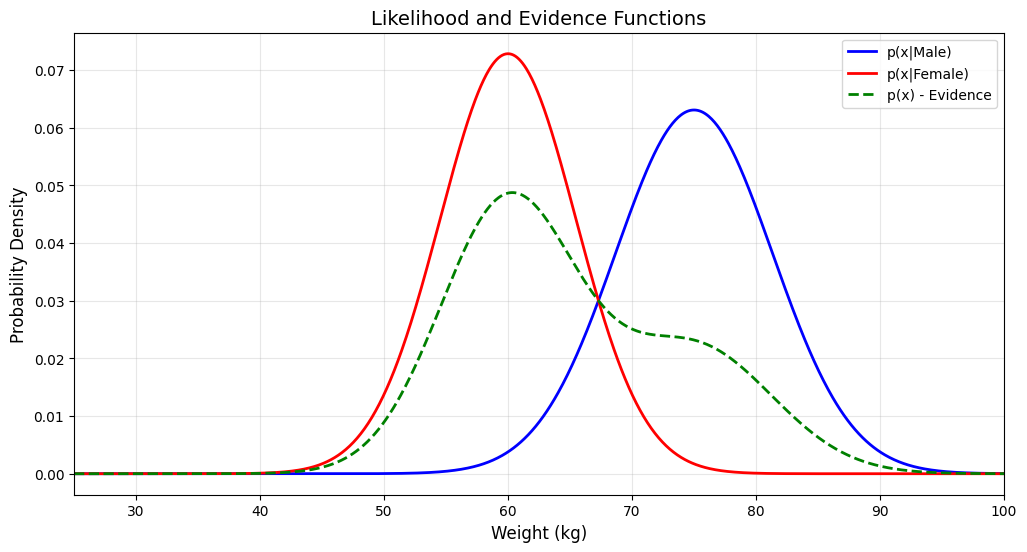

✓ Likelihood functions plotted for Male and Female classes
✓ Evidence function computed and plotted


In [2]:
# Parámetros del problema
# Clases: Male (ω1) y Female (ω2)
mu_male = 75
sigma2_male = 40
mu_female = 60
sigma2_female = 30

# Probabilidades a priori
prior_male = 0.35
prior_female = 0.65

# Dominio del problema: [25, 100] kg con 1000 puntos
x = numpy.linspace(25, 100, 1000)

# Crear las distribuciones Gaussianas (likelihood)
# norm.pdf calcula la función de densidad de probabilidad
likelihood_male = norm.pdf(x, loc=mu_male, scale=numpy.sqrt(sigma2_male))
likelihood_female = norm.pdf(x, loc=mu_female, scale=numpy.sqrt(sigma2_female))

# Calcular la evidencia: p(x) = Σ p(x|ωi) * P(ωi)
evidence = likelihood_male * prior_male + likelihood_female * prior_female

# Plotear las funciones
plt.figure(figsize=(12, 6))

plt.plot(x, likelihood_male, 'b-', label='p(x|Male)', linewidth=2)
plt.plot(x, likelihood_female, 'r-', label='p(x|Female)', linewidth=2)
plt.plot(x, evidence, 'g--', label='p(x) - Evidence', linewidth=2)

plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Likelihood and Evidence Functions', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(25, 100)
plt.show()

print("✓ Likelihood functions plotted for Male and Female classes")
print("✓ Evidence function computed and plotted")

### Posterior probabilities:
The Bayes theorem estimates that the probability of class $\omega_i$ based on observation $x$ may be obtained as:
$$
P(\omega_i|x) = \frac{p(x|\omega_i)\cdot P(\omega_i)}{p(x)}
$$
where $p(x|\omega_i)$ and $P(\omega_i)$ respectively denote the *likelihood* and *prior* probabilities, and *evidence* $p(x)$ acts as a normalization factor. 

Considering the above, compute and plot the *posterior probability* $P(\omega_i|x)$ for the classes in the task.

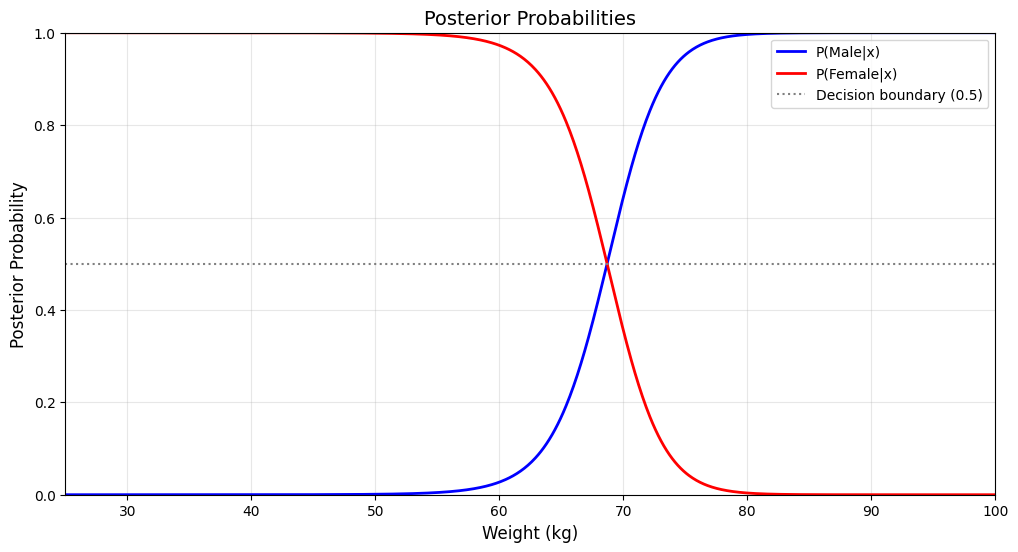

✓ Posterior probabilities computed and plotted
✓ At weight=75kg: P(Male|x)=0.952
✓ At weight=60kg: P(Female|x)=0.973


In [3]:
# Calcular las probabilidades a posteriori usando el Teorema de Bayes
# P(ω|x) = p(x|ω) * P(ω) / p(x)

posterior_male = (likelihood_male * prior_male) / evidence
posterior_female = (likelihood_female * prior_female) / evidence

# Plotear las probabilidades a posteriori
plt.figure(figsize=(12, 6))

plt.plot(x, posterior_male, 'b-', label='P(Male|x)', linewidth=2)
plt.plot(x, posterior_female, 'r-', label='P(Female|x)', linewidth=2)
plt.axhline(y=0.5, color='gray', linestyle=':', label='Decision boundary (0.5)')

plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Posterior Probability', fontsize=12)
plt.title('Posterior Probabilities', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(25, 100)
plt.ylim(0, 1)
plt.show()

print("✓ Posterior probabilities computed and plotted")
print(f"✓ At weight=75kg: P(Male|x)={posterior_male[numpy.argmin(numpy.abs(x-75))]:.3f}")
print(f"✓ At weight=60kg: P(Female|x)={posterior_female[numpy.argmin(numpy.abs(x-60))]:.3f}")

#### Based on these analyses, answer the following questions:
1. Which is the **probability** of estimating the **incorrect class** for each weight value? Plot the resulting function.
2. Which is the **overall error** in this case?
3. Which is the **Bayes error**?
4. Which is the **weight** value that **maximizes the uncertainty**? You may use the method `find_peaks` from the `signal` module in the `scipy` library (*from scipy.signal import find_peaks*)

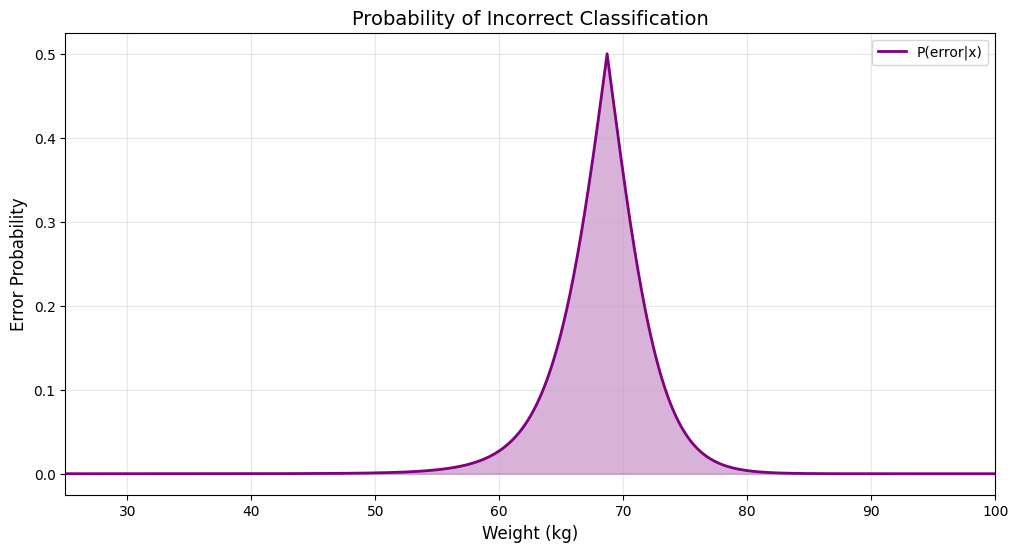

RESULTADOS DEL ANÁLISIS DE ERROR:
1. Función de error P(error|x) ploteada ✓
2. Error global (Overall Error): 0.0923 (9.23%)
3. Error de Bayes: 0.0923 (9.23%)
4. Peso con máxima incertidumbre: 68.69 kg
   En este punto: P(Male|x) = P(Female|x) ≈ 0.500


/var/folders/0m/q5gmrh695pvc0bcq9s0zmcqh0000gr/T/ipykernel_68498/3462111444.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  overall_error = numpy.trapz(error_probability * evidence, x)


In [4]:
# 1. Probabilidad de error para cada valor de peso
# El error es la probabilidad de elegir la clase incorrecta = min(P(Male|x), P(Female|x))
error_probability = numpy.minimum(posterior_male, posterior_female)

# Plotear la función de error
plt.figure(figsize=(12, 6))
plt.plot(x, error_probability, 'purple', linewidth=2, label='P(error|x)')
plt.fill_between(x, error_probability, alpha=0.3, color='purple')
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Error Probability', fontsize=12)
plt.title('Probability of Incorrect Classification', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(25, 100)
plt.show()

# 2. Error global (overall error)
# Es la integral del error ponderado por la evidencia
overall_error = numpy.trapz(error_probability * evidence, x)

# 3. Error de Bayes
# Es el error mínimo alcanzable, que es el mismo que el overall error en este caso
bayes_error = overall_error

# 4. Valor de peso que maximiza la incertidumbre
# La incertidumbre es máxima cuando ambas posteriores son iguales (0.5)
# Buscamos los picos en el error (que es donde hay más incertidumbre)
peaks, _ = find_peaks(error_probability, height=0.4)
max_uncertainty_weight = x[peaks[0]] if len(peaks) > 0 else None

# También podemos buscarlo como el punto donde las posteriores se cruzan
# Es donde el error es máximo
max_error_idx = numpy.argmax(error_probability)
max_uncertainty_weight_exact = x[max_error_idx]

print("=" * 60)
print("RESULTADOS DEL ANÁLISIS DE ERROR:")
print("=" * 60)
print(f"1. Función de error P(error|x) ploteada ✓")
print(f"2. Error global (Overall Error): {overall_error:.4f} ({overall_error*100:.2f}%)")
print(f"3. Error de Bayes: {bayes_error:.4f} ({bayes_error*100:.2f}%)")
print(f"4. Peso con máxima incertidumbre: {max_uncertainty_weight_exact:.2f} kg")
print(f"   En este punto: P(Male|x) = P(Female|x) ≈ {posterior_male[max_error_idx]:.3f}")
print("=" * 60)

### Classification:
Consider now that we have the following set of observations with their associated state of nature:
| Datum | Weight (kg) | Gender |
| :-: | :-: | :-: | 
| #1 | 75 | Male | 
| #2 | 60 | Female | 
| #3 | 90 | Male | 
| #4 | 70 | Female | 
| #5 | 50 | Female | 
| #6 | 65 | Female | 
| #7 | 55 | Female | 
| #8 | 60 | Male | 
| #9 | 85 | Male | 
| #10 | 52 | Female | 

Which would be the **estimated class** in each case under the studied Bayesian learning paradigm? For that, remember that you may omit the $p(x)$ *evidence* term from the Bayes rule as we are addressing a classification task. That is:
$$
\text{estimation} = \argmax_{\omega\in\left\{\text{male},\text{female}\right\}} p(x|\omega)\cdot P(\omega)
$$

Conceptual workflow:
* Create a loop that, for each weight, obtains specified term in the equation for each of the two classes.
+ Estimate the maximum value of the two.
* Return the label

In [ ]:
# Datos de prueba
test_data = [
    (75, 'Male'),
    (60, 'Female'),
    (90, 'Male'),
    (70, 'Female'),
    (50, 'Female'),
    (65, 'Female'),
    (55, 'Female'),
    (60, 'Male'),
    (85, 'Male'),
    (52, 'Female')
]

# Clasificación usando la regla de Bayes: argmax p(x|ω) * P(ω)
print("=" * 80)
print("CLASIFICACIÓN BAYESIANA")
print("=" * 80)
print(f"{'Datum':<8} {'Weight':<10} {'True Label':<12} {'Predicted':<12} {'Score Male':<12} {'Score Female':<12} {'Status'}")
print("-" * 80)

errors = 0
for i, (weight, true_label) in enumerate(test_data, 1):
    # Calcular p(x|ω) * P(ω) para cada clase
    score_male = norm.pdf(weight, loc=mu_male, scale=numpy.sqrt(sigma2_male)) * prior_male
    score_female = norm.pdf(weight, loc=mu_female, scale=numpy.sqrt(sigma2_female)) * prior_female
    
    # Clasificar según el máximo
    predicted = 'Male' if score_male > score_female else 'Female'
    
    # Verificar si hay error
    status = '✓' if predicted == true_label else '✗ ERROR'
    if predicted != true_label:
        errors += 1
    
    print(f"#{i:<7} {weight:<10} {true_label:<12} {predicted:<12} {score_male:<12.6f} {score_female:<12.6f} {status}")

print("=" * 80)
print(f"Total de errores: {errors}/10 ({errors*10}%)")
print("=" * 80)

Based on the results obtained, please discuss:
* Are there any **errors** in the estimation?
* Why?

## From binary to multiclass scenarios: Male VS Female VS Boy VS Girl classification
Let us now generalize the previous case from a two-label classification task to a four-label classification scenario, *i.e.* four *states of nature* $\mathcal{W} = \left\{\omega_1,\omega_2,\omega_3,\omega_4\right\}$ (male, female, boy, girl)

In this case, the parameters of the underlying Gaussian distributions and prior probabilities are:

| Gender ($\omega_i$) | $\mu$ | $\sigma^2$ | Prior (%) |
| :-: | :-: | :-: | :-: |
| Male | 75 | 40 | 25 |
| Female | 60 | 30 | 45 |
| Boy | 40 | 25 | 10 |
| Girl | 30 | 15 | 20 |

Repeat the same analysis as before:
* Obtain and plot *prior* and *evidence* functions.
* Obtain and plot *posterior* functions.
* Compute the error (both per-feature value and global) and derive the maximum uncertainty points.

In [ ]:
# INSERT CODE

### Classification:
Considering the following set of observations, which would be the **estimated class** in each case under this *multiclass* Bayesian learning paradigm?
| Datum | Weight (kg)  |
| :-: | :-:  | 
| #1 | 75 |  
| #2 | 60 | 
| #3 | 90 | 
| #4 | 45 |
| #5 | 30 |
| #6 | 65 |
| #7 | 55 |
| #8 | 100 | 
| #9 | 40 | 
| #10 | 52 |

Note that, the estimation principle is exactly the same as before but we have **four labels** instead for two. That is:
$$
\text{estimation} = \argmax_{\omega\in\left\{\text{male},\text{female},\text{boy},\text{girl}\right\}} p(x|\omega)\cdot P(\omega)
$$


In [ ]:
# INSERT CODE

#### Based on these analyses, answer the following questions:
1. Which conclusion do you obtain when including **more classes/states of nature** in the task?

## Parameter estimation for unknown distributions: Maximum Likelihood Estimation
So far we have assumed that we have complete knowledge about the *likelihood* (as well as the *prior probability*) of the data. Nevertheless, this rarely happens and we only have a collection of data points drawn from that distribution: $\mathcal{D}_i \sim p(x|\omega_i)$. The **goal** in this case is to estimate the parameters $\boldsymbol{\theta}_i$ of a statistical distribution that best approximate the original one. 

To simulate this scenario, we will first sample the data distributions that we have. Considering the four-label classification problem (man, woman, boy, and girl), **how many samples** would you take from each distribution to keep the same *prior probabilities* assuming that we have a dataset with 100 samples?

In [ ]:
# INSERT CODE

Assuming that the *likelihood* functions follow a Gaussian distributio, estimate the $\boldsymbol{\theta} = \{\mu,\sigma^2\}$ parameters for each $\mathcal{W}$ class considering the **Maximum Likehood Estimation** principle.

In [ ]:
# INSERT CODE

#### Based on these analyses, answer the following questions:
1. How **well** are the **parameters estimated**?
2. And if we consider **half of the total amount** of samples?
3. And if we consider a total of **1000 samples**?

## From single- to multiple-feature description
So far we have considered that the gender of a person may be estimated with the sole information provided by its **weight**. Nevertheless, we may be able to use other descriptors that could improve the capabilities of the model. For that, we will include a second feature to the task: the **height** of the person. In this regard, our feature space will now be represented as $\mathbf{x}\in\mathbb{R}^2$ and, assuming a Gaussian distribution for the features, our task will be modeled with bi-variate Gaussian distributions.




Based on the above, the parameters of the underlying bi-variate Gaussian distributions and prior probabilities are (note that, for simplicity and without any loss of generality, we will consider the two-label *male VS female* classification scenario for this analysis):

| Gender ($\omega_i$) | Weight (kg) - $\mu$ | Weight (kg) - $\sigma^2$ | Height (cm) - $\mu$ | Height (cm) - $\sigma^2$ | Prior (%) |
| :-: | :-: | :-: | :-: | :-: | :-: |
| Male | 75 | 40 | 180 | 35 | 35 |
| Female | 60 | 30 | 160 | 25 | 65 |


Considering these data, create the bivariate Gaussian distrubutions using the `multivariate_normal` method of the `scipy.stats` library. The mean vectors and covariance matrices are already provided, together with the *priors*:

In [ ]:
# Mean vectors and covariance matrices for the bivariate Gaussian distribution model:
mean_man = [75, 180]
covariance_man = [[40, 20], [20, 35]]

mean_woman = [60, 160]
covariance_woman = [[30, 10], [10, 25]]

### Prior probabilities:
prior = {
    'man': 0.35,
    'woman': 0.65
}

In [ ]:
# INSERT CODE

### Classification:
Consider now that we have the following set of observations with their associated state of nature:
| Datum | Weight (kg) | Height (cm) | Gender |
| :-: | :-: | :-: | :-: | 
| #1 | 75 | 180 | Male | 
| #2 | 60 | 165 | Female | 
| #3 | 90 | 200 | Male | 
| #4 | 70 | 175 | Female | 
| #5 | 50 | 160 | Female | 
| #6 | 65 | 170 | Female | 
| #7 | 55 | 155 | Female | 
| #8 | 60 | 170 | Male | 
| #9 | 85 | 180 | Male | 
| #10 | 52 | 160 | Female | 

Which would be the **estimated class** in each case under the studied Bayesian learning paradigm? For that, remember that you may omit the $p(\mathbf{x})$ *evidence* term from the Bayes rule as we are addressing a classification task. That is:
$$
\text{estimation} = \argmax_{\omega\in\left\{\text{male},\text{female}\right\}} p(\boldsymbol{x}|\omega)\cdot P(\omega)
$$

Conceptual workflow:
* Create a loop that, for each weight, obtains the specified term in the equation for each of the two classes.
+ Estimate the maximum value of the two.
* Return the label

In [ ]:
# INSERT CODE

### The Naive Bayes classifier
The Naive Bayes for multivariate scenarios methods constitutes a particular case of the studied Bayesian learning principle in which its is assumed that features and **conditionally independent** of each other (*i.e.*, there is no depence among them). This fact simplifies the modeling of the *likelihood* function as it changes from the estimation of a multivariate function to that of as many univariate functions as features are used in the task.

Let us consider a $d$-dimensional feature vector $\mathbf{x}\in\mathbb{R}^d = [x_1,\ldots, x_d]$. Assuming the availability of the *likelihood* and *priors* of the distributions, the Bayes decision rule states the following:
$$
p(\omega|\mathbf{x}) = p(\omega|x_1,\ldots, x_d) = \frac{p(x_1,\ldots,x_d|\omega)\cdot P(\omega)}{p(x_1,\ldots, x_d)} 
$$

Assuming the **conditional independence** statement of the Naive Bayes approach, the rule may be rewritten as:
$$
p(\omega|\mathbf{x}) = \frac{P(\omega)\cdot\prod_{i=1}^{d}p(x_i|\omega)}{p(\mathbf{x})} 
$$

Independently of whether we know the multivariate $p(x_1,\ldots,x_d|\omega)$ function or it is completely unknown, this method requires the estimation of the univariate *likelihood* functions $p(x_i|\omega)\; \text{with}\;1\leq i\leq d$. In this regard, one must consider a *sampled* set of data from the original *multivariate distribution* and use the **Maximum Likelihood Estimation** principle for each individual dimension.

As in the previous cases, the $p(\mathbf{x})$ *evidence* factor may be obviated for classification tasks:
$$
\text{estimation} = \argmax_{\omega\in\mathcal{W}} P(\omega)\cdot\prod_{i=1}^{d}p(x_i|\omega)
$$

In this final exercise we will build a Naive Bayes classifier to illustrate this learning principle. For that, we will consider to approaches:
* A mathematical one in the line of the previously addressed tasks.
* A practical one based on the **scikit-learn** (sklearn) library, which represents one of the main Machine Learning libraries for the Python programming language.


To facilitate the task, we provide the sampling of the distributions as well as the prior probabilities:


In [ ]:
# Mean vectors and covariance matrices for the bivariate Gaussian distribution model:
mean_man = [75, 180]
covariance_man = [[40, 20], [20, 35]]

mean_woman = [60, 160]
covariance_woman = [[30, 10], [10, 25]]

# Creating the bivariate distributions for man and woman:
bivariate_distribution_man = multivariate_normal(mean = mean_man, cov = covariance_man)
bivariate_distribution_woman = multivariate_normal(mean = mean_woman, cov = covariance_woman)

# Prior probabilities:
prior = {
    'man': 0.5,
    'woman': 0.5
}

# Sampling
D_man = bivariate_distribution_man.rvs(100)
D_woman = bivariate_distribution_man.rvs(100)

# Data partitioning:
D_man_train = D_man[:95]
D_woman_train = D_woman[:95]

D_man_test = D_man[95:]
D_woman_test = D_woman[95:]

# Creating the train and test sets:
train_data_features = numpy.vstack([D_man_train, D_woman_train]) 
train_data_labels = ['man'] * len(D_man_train) + ['woman'] * len(D_woman_train)
test_data_features = numpy.vstack([D_man_test, D_woman_test])
test_data_labels = ['man'] * len(D_man_test) + ['woman'] * len(D_woman_test)

#### Mathematical approach
In this first case you must implement the Naive Bayes estimation attending to the mathematical formulation presented before. To facilitate the task, you may consider the following tips:
* The `numpy` library includes the `mean` and `std` methods that respectively compute the average and standard deviation of a given set of data. 
* All our data collections (D_man_train, D_woman_train, ...) are matrices with as many rows as the number of samples and as many columns as the number of features ($d$). To access each of them you may do:
    * `D_man_train[:,0]`: accesses feature in position 0 for all elements in the collection
    * `D_man_train[0,:]`: accesses all feature for the element in position 0 of the collection

Considering the above, estimate the parameters (mean and variance) of the **four** distributions that you need:
* **Weight** distribution for *man*
* **Weight** distribution for *woman*
* **Height** distribution for *man*
* **Height** distribution for *woman*

In [ ]:
# INSERT CODE

Once you have obtained the **four distributions** (one per feature and class), estimate the labels of the *test* data collection (variable *test_data*). For that you will have to implement the introduced decision rule in the Naive Bayes method , *i.e.*:
$$
\text{estimation} = \argmax_{\omega\in\mathcal{W}} P(\omega)\cdot\prod_{i=1}^{d}p(x_i|\omega)
$$

For our task this rule may be directly expressed as:
$$
\text{estimation} = 
\begin{cases}
\text{man}\; \text{if}\; P(\text{man})\cdot P(\text{height}|\text{man})\cdot P(\text{weight}|\text{man}) > P(\text{woman})\cdot P(\text{height}|\text{woman})\cdot P(\text{weight}|\text{woman})\\
\text{woman}\; \text{otherwise}
\end{cases}
$$
being *height* and *weight* the particular descriptors of each of the elements in the *test_data* assortment. 

In [ ]:
# INSERT CODE

#### Library approach
Finally, to corroborate that the manual implementation of the Naive Bayes rule is correct, you may use the already-existing implementation in the *sklearn* library. For that, proceed as detailed:
1. Import the model using: *from sklearn.naive_bayes import GaussianNB*
2. Create an *empty* Naive Bayes classifier (*i.e.*, a model that has never been train): *model = GaussianNB()*
3. Train the model using the created assortments: *model.fit(train_data_features, train_data_labels)*
4. Use the model to estimate the classes for the test partition: *model.predict(test_data_features)*

In [ ]:
# INSERT CODE